<a href="https://colab.research.google.com/github/zoeqwido/Olist-E-commerce-EDA/blob/main/Olist_E_commerce_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

## CLEANING

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translate = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders.shape

(99441, 8)

In [ ]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders = orders[orders['order_status'] == 'delivered']

In [ ]:
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [ ]:
orders[orders['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [ ]:
orders['order_id'].duplicated().value_counts()

False    96478
Name: order_id, dtype: int64

In [ ]:
orders['order_status'].value_counts()

delivered    96478
Name: order_status, dtype: int64

In [ ]:
df1 = pd.merge(orders, reviews, how='left', on='order_id')
df = pd.merge(df1, items, how='left', on='order_id')

In [ ]:
df = pd.merge(df, products, how='left', on='product_id')

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4.0,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
110836,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5.0,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
110837,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
110838,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [ ]:
df = df.drop(columns=['review_id','review_comment_title','review_answer_timestamp','review_creation_date','review_comment_message'
                     ,'shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty'
                      ,'product_weight_g','product_length_cm','product_height_cm','product_width_cm'])

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,bebes
110836,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,eletrodomesticos_2
110837,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios
110838,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios


In [ ]:
df[df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,price,freight_value,product_category_name
5871,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,4.0,1,0e20a07ca1714df21f9b07ca3bf7c682,4e7c18b98d84e05cbae3ff0ff03846c2,309.90,39.11,eletroportateis
18447,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,5.0,1,2c2b6a28924791234bd386bddb17512e,a4b6b9b992b46e9ef863637af96e04bc,379.00,17.86,construcao_ferramentas_seguranca
21203,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,5.0,1,583916a5dae918f5e89baec139141c54,3481aa57cd91f9f9d3fa1fa12d9a3bf7,49.99,15.53,NaN
25226,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,5.0,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,79.99,26.82,cool_stuff
25775,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,5.0,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,79.99,15.77,cool_stuff
29849,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00,4.0,1,5ab02ca028398131a5ae91401eb49788,80e6699fe29150b372a0c8a1ebf7dcc8,39.99,14.52,esporte_lazer
42629,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00,5.0,1,cae2e38942c8489d9d7a87a3f525c06b,cca3071e3e9bb7d12640c9fbe2301306,149.80,13.63,moveis_decoracao
43802,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00,5.0,1,02a79d79e818ad0be36cfc843a6af7ad,cb3dd9ce66268c7a3ca7241ac70ab58c,28.99,10.96,esporte_lazer
53871,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00,2.0,1,c3b271f47e73d0c9ccf1b43b7606c705,cca3071e3e9bb7d12640c9fbe2301306,45.90,14.52,moveis_decoracao
68670,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00,5.0,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,135.00,19.23,ferramentas_jardim


In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df.order_purchase_timestamp)
df['order_approved_at'] = pd.to_datetime(df.order_approved_at)
df['order_delivered_carrier_date'] = pd.to_datetime(df.order_delivered_carrier_date)
df['order_delivered_customer_date'] = pd.to_datetime(df.order_delivered_customer_date)
df['order_estimated_delivery_date'] = pd.to_datetime(df.order_estimated_delivery_date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110840 entries, 0 to 110839
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110840 non-null  object        
 1   customer_id                    110840 non-null  object        
 2   order_status                   110840 non-null  object        
 3   order_purchase_timestamp       110840 non-null  datetime64[ns]
 4   order_approved_at              110825 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110838 non-null  datetime64[ns]
 6   order_delivered_customer_date  110832 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110840 non-null  datetime64[ns]
 8   review_score                   110013 non-null  float64       
 9   order_item_id                  110840 non-null  int64         
 10  product_id                     110840 non-null  object        
 11  

# Analysis

## Tổng quát Doanh thu 2017

In [ ]:
year2017 = df[df['order_purchase_timestamp'].dt.year == 2017]
year2017['Month'] = year2017['order_purchase_timestamp'].dt.month
year2017 = pd.merge(year2017, translate, how='left', on='product_category_name')

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\3096860595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2017['Month'] = year2017['order_purchase_timestamp'].dt.month


In [ ]:
year2017.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 15
order_delivered_carrier_date       2
order_delivered_customer_date      2
order_estimated_delivery_date      0
review_score                     424
order_item_id                      0
product_id                         0
seller_id                          0
price                              0
freight_value                      0
product_category_name            880
Month                              0
product_category_name_english    884
dtype: int64

In [ ]:
year2017[year2017['order_delivered_carrier_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,price,freight_value,product_category_name,Month,product_category_name_english
36733,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,5.0,1,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,179.0,14.98,moveis_decoracao,9,furniture_decor
46511,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,5.0,1,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,179.0,15.00,esporte_lazer,5,sports_leisure


In [ ]:
year2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,price,freight_value,product_category_name,Month,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,10,housewares
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,11,pet_shop
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,4.0,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,147.90,27.36,automotivo,7,auto
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,5.0,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,59.99,15.17,automotivo,5,auto
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,19.90,16.05,moveis_decoracao,1,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,5.0,2,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,26.90,36.98,brinquedos,10,toys
49944,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,5.0,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,370.00,19.43,beleza_saude,1,health_beauty
49945,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,5.0,1,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,139.90,16.09,moveis_decoracao,2,furniture_decor
49946,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,5.0,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,72.00,13.08,beleza_saude,3,health_beauty


In [ ]:
year2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49948 entries, 0 to 49947
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       49948 non-null  object        
 1   customer_id                    49948 non-null  object        
 2   order_status                   49948 non-null  object        
 3   order_purchase_timestamp       49948 non-null  datetime64[ns]
 4   order_approved_at              49933 non-null  datetime64[ns]
 5   order_delivered_carrier_date   49946 non-null  datetime64[ns]
 6   order_delivered_customer_date  49946 non-null  datetime64[ns]
 7   order_estimated_delivery_date  49948 non-null  datetime64[ns]
 8   review_score                   49524 non-null  float64       
 9   order_item_id                  49948 non-null  int64         
 10  product_id                     49948 non-null  object        
 11  seller_id      

In [ ]:
a =  (year2017.order_approved_at - year2017.order_purchase_timestamp).median()
b =  (year2017.order_delivered_carrier_date - year2017.order_approved_at).median()
c =  (year2017.order_delivered_customer_date - year2017.order_delivered_carrier_date).median()

In [ ]:
year2017['order_approved_at'] = year2017['order_approved_at'].fillna(year2017['order_purchase_timestamp'] + a)
year2017['order_delivered_carrier_date'] = year2017['order_delivered_carrier_date'].fillna(year2017['order_approved_at'] + b)
year2017['order_delivered_customer_date'] = year2017['order_delivered_customer_date'].fillna(year2017['order_delivered_carrier_date'] + c)

In [ ]:
year2017.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
review_score                     424
order_item_id                      0
product_id                         0
seller_id                          0
price                              0
freight_value                      0
product_category_name            880
Month                              0
product_category_name_english    884
dtype: int64

In [ ]:
year2017['DeliveryTime'] = year2017.order_delivered_customer_date - year2017.order_purchase_timestamp
year2017['approve_time'] = year2017.order_approved_at - year2017.order_purchase_timestamp
year2017['carrier_time'] = year2017.order_delivered_carrier_date - year2017.order_approved_at
year2017['customer_time'] = year2017.order_delivered_customer_date - year2017.order_delivered_carrier_date
year2017['cpwestimated'] = year2017.order_estimated_delivery_date - year2017.order_delivered_customer_date
year2017['DeliveryTime'] = year2017['DeliveryTime'].dt.days
year2017['cpwestimated'] = year2017['cpwestimated'].dt.days
year2017['customer_day'] = abs(year2017.order_delivered_customer_date.dt.day - year2017.order_delivered_carrier_date.dt.day)

In [ ]:
year2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,product_category_name,Month,product_category_name_english,DeliveryTime,approve_time,carrier_time,customer_time,cpwestimated,customer_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,...,8.72,utilidades_domesticas,10,housewares,8,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,7,6
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,1,...,27.20,pet_shop,11,pet_shop,13,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12,20
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,4.0,1,...,27.36,automotivo,7,auto,16,0 days 00:13:08,1 days 16:47:51,14 days 19:59:51,5,15
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,5.0,1,...,15.17,automotivo,5,auto,9,0 days 00:11:41,5 days 20:45:35,4 days 02:48:05,11,4
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,1,...,16.05,moveis_decoracao,1,furniture_decor,9,1 days 08:21:38,1 days 11:25:44,6 days 23:51:39,31,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,5.0,2,...,36.98,brinquedos,10,toys,16,0 days 00:09:37,0 days 20:45:38,15 days 03:32:53,17,15
49944,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,5.0,1,...,19.43,beleza_saude,1,health_beauty,11,0 days 00:35:22,3 days 10:34:51,8 days 01:35:09,37,23
49945,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,5.0,1,...,16.09,moveis_decoracao,2,furniture_decor,11,0 days 00:09:59,6 days 01:07:41,5 days 00:45:16,15,5
49946,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,5.0,1,...,13.08,beleza_saude,3,health_beauty,8,0 days 00:00:00,1 days 01:23:58,7 days 03:49:58,10,7


In [ ]:
revenue2017 = year2017.groupby('Month')['order_id','price','freight_value'].agg({'order_id':'nunique',
                                                                                 'price':'sum',
                                                                                 'freight_value': 'sum'})

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\535108778.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue2017 = year2017.groupby('Month')['order_id','price','freight_value'].agg({'order_id':'nunique',


In [ ]:
revenue2017['revenue'] = revenue2017['price'] + revenue2017['freight_value']
revenue2017.rename(columns = {'order_id':'Total_order'}, inplace = True)
revenue2017

,Total_order,price,freight_value,revenue
Month,,,,
1,750,112573.39,15880.71,128454.10
2,1653,235483.40,37173.86,272657.26
3,2546,360865.25,55462.05,416327.30
4,2303,341209.62,50274.83,391484.45
5,3546,492620.44,78217.46,570837.90
6,3135,425387.66,68759.81,494147.47
7,3872,484637.74,85389.74,570027.48
8,4193,559317.01,92106.73,651423.74
9,4150,609750.15,94228.39,703978.54


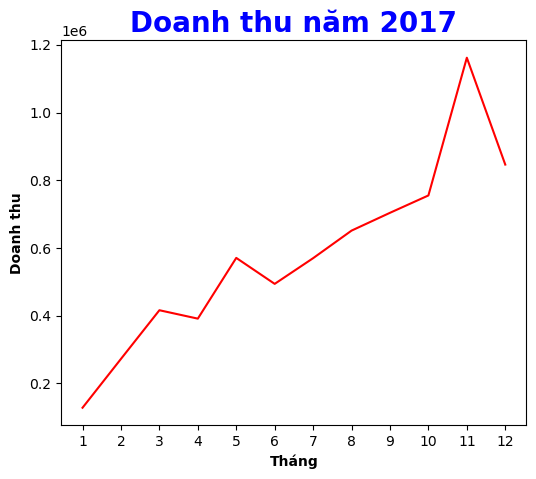

In [ ]:
plt.figure(figsize=(6,5))
sns.lineplot(data = revenue2017, x = 'Month', y='revenue',color = 'red')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title('Doanh thu năm 2017',fontsize =20,color = 'blue',fontweight = 'bold')
plt.xlabel('Tháng',fontsize = 10,fontweight ='bold')
plt.ylabel('Doanh thu',fontsize = 10,fontweight ='bold')
plt.show()

DOANH THU tăng mạnh vào THÁNG 11

In [ ]:
november2017 = year2017[year2017['order_purchase_timestamp'].dt.month == 11]
november2017['Day'] = november2017['order_purchase_timestamp'].dt.day
revenueNovember2017 = november2017.groupby('Day')['order_id','price','freight_value'].agg({'order_id':'nunique',
                                                                                           'price': 'sum',
                                                                                           'freight_value':'sum'})
november2017['revenue'] = november2017.price + november2017.freight_value
revenueNovember2017.rename(columns = {'order_id':'Total_order'}, inplace = True)
revenueNovember2017['revenue'] = revenueNovember2017['price'] + revenueNovember2017['freight_value']
november2017 = pd.merge(november2017, sellers, how='left', on='seller_id')
november2017 = november2017.drop(columns = ['seller_zip_code_prefix','order_status'])
revenueNovember2017

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\1055861511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  november2017['Day'] = november2017['order_purchase_timestamp'].dt.day
C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\1055861511.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenueNovember2017 = november2017.groupby('Day')['order_id','price','freight_value'].agg({'order_id':'nunique',
C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\1055861511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Total_order,price,freight_value,revenue
Day,,,,
1,108,19363.71,2665.46,22029.17
2,117,21074.93,2750.70,23825.63
3,138,22844.05,3192.10,26036.15
4,106,19281.55,3074.27,22355.82
5,137,16602.45,3567.60,20170.05
6,182,27673.15,4430.78,32103.93
7,154,19801.70,3702.58,23504.28
8,169,18594.64,3864.04,22458.68
9,182,24307.55,3737.58,28045.13


<Figure size 1000x500 with 0 Axes>

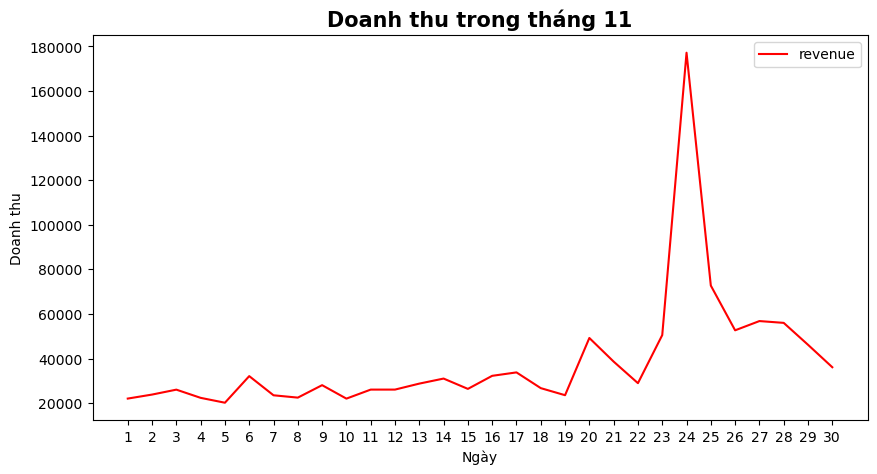

In [ ]:
plt.figure(figsize = (10,5))
# sns.lineplot(data = revenueNovember2017,x=revenueNovember2017.index,y='Total_order',color = 'dodgerblue',label = 'revenue')
# plt.title('Doanh thu và doanh số trong tháng 11',fontsize=15,fontweight='bold')
# plt.xlabel('Ngày',fontsize=15)
# plt.ylabel('Số đơn',fontsize=15)
# plt.twinx()
plt.figure(figsize = (10,5))
sns.lineplot(data = revenueNovember2017, x='Day', y='revenue',color ='red',label='revenue')
plt.title('Doanh thu trong tháng 11',fontsize=15,fontweight='bold')
plt.xlabel('Ngày',fontsize=10)
plt.ylabel('Doanh thu',fontsize=10)
plt.xticks(range(1, 31))
plt.legend()
plt.show()

Ngày 24 có doanh thu và doanh số cao đột biến

## Doanh thu ngày 24

In [ ]:
a = np.array([revenueNovember2017[revenueNovember2017.index != 24].revenue.sum(),revenueNovember2017[revenueNovember2017.index == 24].revenue])
explode = [0, 0.15]
color = ['lightcoral','dodgerblue']
label1 = ['Các ngày còn lại','Ngày 24']
a

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\2753159750.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([revenueNovember2017[revenueNovember2017.index != 24].revenue.sum(),revenueNovember2017[revenueNovember2017.index == 24].revenue])


array([984741.9100000003, Day
                          24    177178.62
                          Name: revenue, dtype: float64], dtype=object)

Text(0.5, 1.0, 'Doanh thu ngày 24 với các ngày còn lại trong tháng 11')

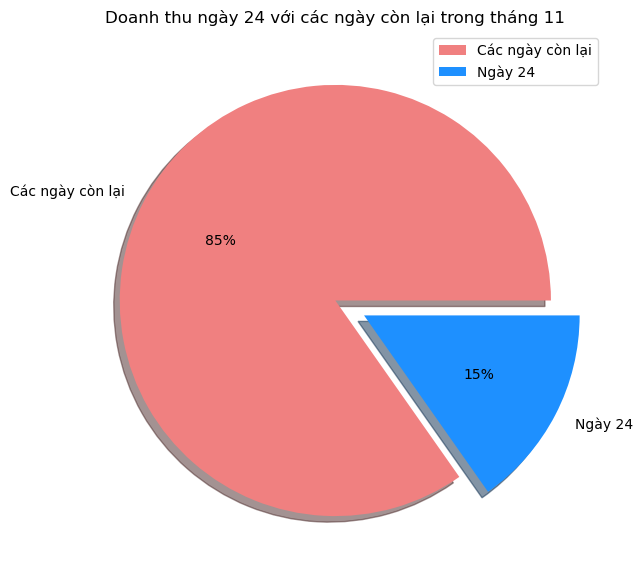

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(a,autopct='%.0f%%',explode=explode,shadow = True,colors=color,labels=label1)
plt.legend()
plt.title('Doanh thu ngày 24 với các ngày còn lại trong tháng 11')

In [ ]:
b = np.array([revenueNovember2017[revenueNovember2017.index != 24].Total_order.sum(),revenueNovember2017[revenueNovember2017.index == 24].Total_order])
explode = [0, 0.15]
color = ['lightcoral','dodgerblue']
label1 = ['Các ngày còn lại','Ngày 24']

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\1600095268.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array([revenueNovember2017[revenueNovember2017.index != 24].Total_order.sum(),revenueNovember2017[revenueNovember2017.index == 24].Total_order])


Text(0.5, 1.0, 'Doanh số ngày 24 với các ngày còn lại trong tháng 11')

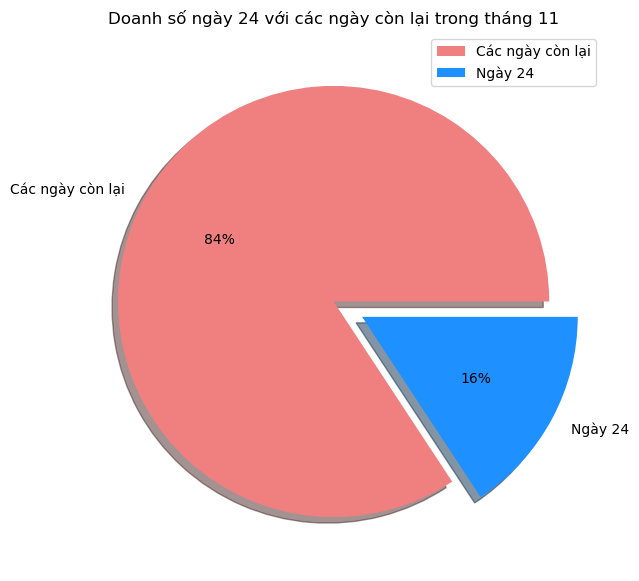

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(b,autopct='%.0f%%',explode=explode,shadow = True,colors=color,labels=label1)
plt.legend()
plt.title('Doanh số ngày 24 với các ngày còn lại trong tháng 11')

## Doanh thu và Doanh số các mặt hàng trong ngày 24

In [ ]:
november2017

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,...,DeliveryTime,approve_time,carrier_time,customer_time,cpwestimated,customer_day,Day,revenue,seller_city,seller_state
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,13,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12,20,18,72.20,belo horizonte,MG
1,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,5.0,1,cce679660c66e6fbd5c8091dfd29e9cd,...,6,0 days 00:10:41,2 days 21:18:04,3 days 20:55:34,13,4,21,29.75,ibitinga,SP
2,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,1.0,1,be021417a6acb56b9b50d3fd2714baa8,...,33,0 days 02:53:21,18 days 20:52:56,14 days 21:45:18,-8,15,24,356.12,rio do sul,SC
3,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,4.0,1,15a9e834e89eab39d973492882c658d6,...,4,1 days 04:49:03,2 days 19:15:43,0 days 22:21:39,12,1,30,91.66,sao paulo,SP
4,8f06cc6465925031568537b815f1198d,9916715c2ab6ee1710c9c32f0a534ad2,2017-11-15 11:31:41,2017-11-15 11:46:42,2017-11-16 22:03:00,2017-11-22 22:41:07,2017-12-05,5.0,1,12087840651e83b48206b82c213b76fd,...,7,0 days 00:15:01,1 days 10:16:18,6 days 00:38:07,12,6,15,317.34,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8532,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,2017-11-26 10:26:55,2017-11-26 10:36:06,2017-11-27 22:49:48,2017-12-16 02:54:56,2018-01-03,4.0,1,ea4f4b5a820fea007c6c8d7ef9a790bc,...,19,0 days 00:09:11,1 days 12:13:42,18 days 04:05:08,17,11,26,71.36,ribeirao preto,SP
8533,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15,5.0,1,526f833e1eb0a32ad9351145a761b9ab,...,8,0 days 00:11:26,0 days 22:39:36,8 days 00:05:16,9,22,26,141.40,sao paulo,SP
8534,788541a19c0791de0504c5a9cb7e7bd5,a537aaf902d2f436eb7f44817154bb68,2017-11-30 17:54:28,2017-11-30 18:16:25,2017-12-05 20:58:57,2017-12-13 20:34:50,2017-12-27,5.0,1,27d0fc55e3d2fe698088f2603e0a2ab6,...,13,0 days 00:21:57,5 days 02:42:32,7 days 23:35:53,13,8,30,147.35,santo andre,SP
8535,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08,4.0,1,9503faef00966962beacdb4916272305,...,10,0 days 00:10:49,5 days 20:50:00,4 days 23:29:54,5,25,21,319.25,sao paulo,SP


In [ ]:
november24Product_revenue = november2017[november2017.Day == 24].groupby('product_category_name_english')['order_id','revenue'].agg({'order_id':'nunique','revenue':'sum'}).reset_index().sort_values('revenue')

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\425722226.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  november24Product_revenue = november2017[november2017.Day == 24].groupby('product_category_name_english')['order_id','revenue'].agg({'order_id':'nunique','revenue':'sum'}).reset_index().sort_values('revenue')


In [ ]:
november24Product_revenue.tail()

,product_category_name_english,order_id,revenue
25,health_beauty,81,13254.07
9,computers_accessories,61,13264.91
22,furniture_decor,87,14431.46
44,watches_gifts,68,18992.86
4,bed_bath_table,154,21229.11


In [ ]:
november24Product_totalorder = november2017[november2017.Day == 24].groupby('product_category_name_english')['order_id','revenue'].agg({'order_id':'nunique','revenue':'sum'}).reset_index().sort_values('order_id')
november24Product_totalorder

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\1727371717.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  november24Product_totalorder = november2017[november2017.Day == 24].groupby('product_category_name_english')['order_id','revenue'].agg({'order_id':'nunique','revenue':'sum'}).reset_index().sort_values('order_id')


,product_category_name_english,order_id,revenue
20,fixed_telephony,1,32.78
6,books_technical,1,153.17
7,christmas_supplies,1,162.91
8,cine_photo,1,259.94
33,market_place,1,212.95
15,costruction_tools_garden,1,85.95
11,construction_tools_construction,1,31.82
13,construction_tools_safety,1,146.57
0,agro_industry_and_commerce,2,6503.19
27,home_appliances_2,2,880.55


In [ ]:
november24Product_revenue[(november24Product_revenue['product_category_name_english'] != 'health_beauty') &
                          (november24Product_revenue['product_category_name_english'] != 'computers_accessories') &
                          (november24Product_revenue['product_category_name_english'] != 'furniture_decor') &
                          (november24Product_revenue['product_category_name_english'] != 'watches_gifts') &
                          (november24Product_revenue['product_category_name_english'] != 'bed_bath_table') ]['revenue'].sum()

95195.36

In [ ]:
revenue24 = np.array([95195.36,13254.07,13264.91,14431.46,18992.86,21229.11])
label2 = ['others','health_beauty','computers_accessories','furniture_decor','watches_gifts','bed_bath_table']

Text(0.5, 1.0, 'Doanh thu các mặt hàng ngày 24')

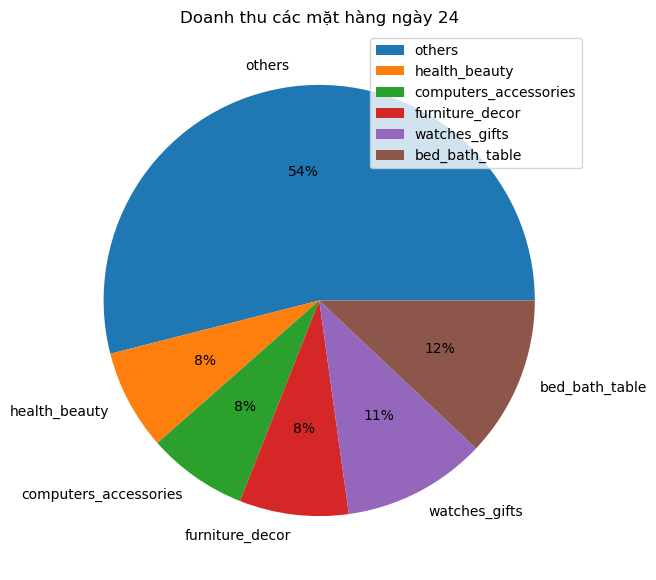

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(revenue24,autopct='%.0f%%',labels=label2)
plt.legend()
plt.title('Doanh thu các mặt hàng ngày 24')

In [ ]:
len(november24Product_revenue)

45

In [ ]:
november24Product_totalorder[(november24Product_totalorder['product_category_name_english'] != 'sports_leisure') &
                          (november24Product_totalorder['product_category_name_english'] != 'health_beauty') &
                          (november24Product_totalorder['product_category_name_english'] != 'garden_tools') &
                          (november24Product_totalorder['product_category_name_english'] != 'furniture_decor') &
                          (november24Product_totalorder['product_category_name_english'] != 'bed_bath_table') ]['order_id'].sum()

660

In [ ]:
order24 = np.array([660,78,81,86,87,154])
label3 = ['others','sports_leisure','health_beauty','garden_tools','furniture_decor','bed_bath_table']

Text(0.5, 1.0, 'Doanh số các mặt hàng ngày 24')

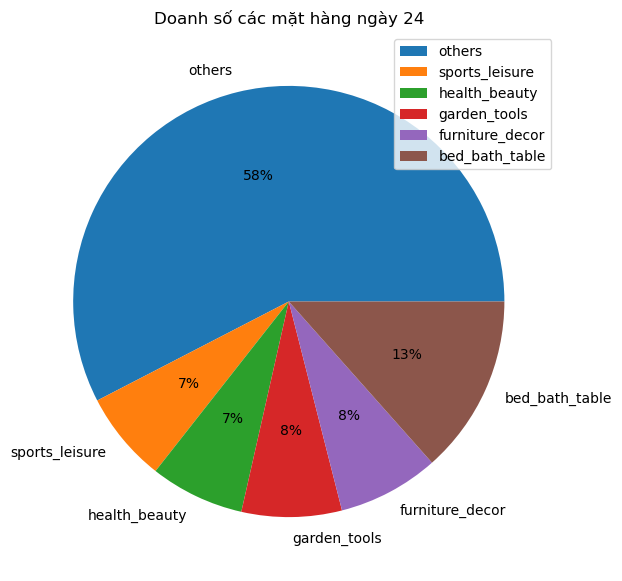

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(order24,autopct='%.0f%%',labels=label3)
plt.legend()
plt.title('Doanh số các mặt hàng ngày 24')

## Trung bình ĐIỂM ĐÁNH GIÁ của khách hàng

In [ ]:
year2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,product_category_name,Month,product_category_name_english,DeliveryTime,approve_time,carrier_time,customer_time,cpwestimated,customer_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,...,8.72,utilidades_domesticas,10,housewares,8,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,7,6
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,1,...,27.20,pet_shop,11,pet_shop,13,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12,20
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,4.0,1,...,27.36,automotivo,7,auto,16,0 days 00:13:08,1 days 16:47:51,14 days 19:59:51,5,15
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,5.0,1,...,15.17,automotivo,5,auto,9,0 days 00:11:41,5 days 20:45:35,4 days 02:48:05,11,4
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,1,...,16.05,moveis_decoracao,1,furniture_decor,9,1 days 08:21:38,1 days 11:25:44,6 days 23:51:39,31,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,5.0,2,...,36.98,brinquedos,10,toys,16,0 days 00:09:37,0 days 20:45:38,15 days 03:32:53,17,15
49944,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,5.0,1,...,19.43,beleza_saude,1,health_beauty,11,0 days 00:35:22,3 days 10:34:51,8 days 01:35:09,37,23
49945,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,5.0,1,...,16.09,moveis_decoracao,2,furniture_decor,11,0 days 00:09:59,6 days 01:07:41,5 days 00:45:16,15,5
49946,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,5.0,1,...,13.08,beleza_saude,3,health_beauty,8,0 days 00:00:00,1 days 01:23:58,7 days 03:49:58,10,7


In [ ]:
november2017[november2017.Day == 24]['review_score'].mean()

3.664936990363232

In [ ]:
year2017['review_score'].mean()

4.10841208303045

## Delivery

In [ ]:
LateDelivery = november2017[november2017['cpwestimated'] < 0]
LateDelivery24 = LateDelivery[LateDelivery['Day'] == 24]


In [ ]:
year2017['order_id'].nunique()

43428

In [ ]:
year2017['order_id'][year2017.cpwestimated <0].nunique()

2878

In [ ]:
november24Product_totalorder['order_id'].sum()

1146

In [ ]:
LateDelivery24['order_id'].nunique()

229

In [ ]:
LateDelivery24['order_id'].nunique()/november24Product_totalorder['order_id'].sum()

0.19982547993019198

In [ ]:
year2017['order_id'][year2017.cpwestimated <0].nunique()/year2017['order_id'].nunique()

0.06627060882380031

Text(0.5, 1.0, 'Tỉ lệ giao hàng trễ')

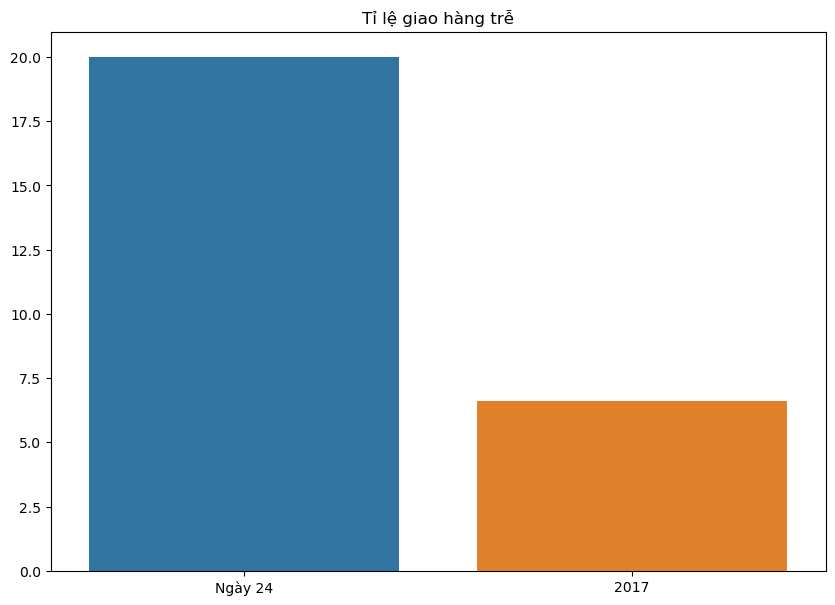

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = ['Ngày 24','2017'], y =[19.982547993019198,6.627060882380031])
plt.title('Tỉ lệ giao hàng trễ')

Tỉ lệ giao hàng trễ cả năm là 6% còn tỉ lệ giao hàng trễ trong ngày 24 là 20%

## AVG THỜI GIAN GIAO HÀNG ngày 24 vs cả năm

In [ ]:
year2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,...,freight_value,product_category_name,Month,product_category_name_english,DeliveryTime,approve_time,carrier_time,customer_time,cpwestimated,customer_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,1,...,8.72,utilidades_domesticas,10,housewares,8,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,7,6
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,1,...,27.20,pet_shop,11,pet_shop,13,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12,20
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,4.0,1,...,27.36,automotivo,7,auto,16,0 days 00:13:08,1 days 16:47:51,14 days 19:59:51,5,15
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,5.0,1,...,15.17,automotivo,5,auto,9,0 days 00:11:41,5 days 20:45:35,4 days 02:48:05,11,4
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,1,...,16.05,moveis_decoracao,1,furniture_decor,9,1 days 08:21:38,1 days 11:25:44,6 days 23:51:39,31,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,5.0,2,...,36.98,brinquedos,10,toys,16,0 days 00:09:37,0 days 20:45:38,15 days 03:32:53,17,15
49944,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,5.0,1,...,19.43,beleza_saude,1,health_beauty,11,0 days 00:35:22,3 days 10:34:51,8 days 01:35:09,37,23
49945,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,5.0,1,...,16.09,moveis_decoracao,2,furniture_decor,11,0 days 00:09:59,6 days 01:07:41,5 days 00:45:16,15,5
49946,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,5.0,1,...,13.08,beleza_saude,3,health_beauty,8,0 days 00:00:00,1 days 01:23:58,7 days 03:49:58,10,7


In [ ]:
LateDelivery24.DeliveryTime.mean()

32.38076923076923

In [ ]:
year2017.DeliveryTime.mean()

12.450548570513334

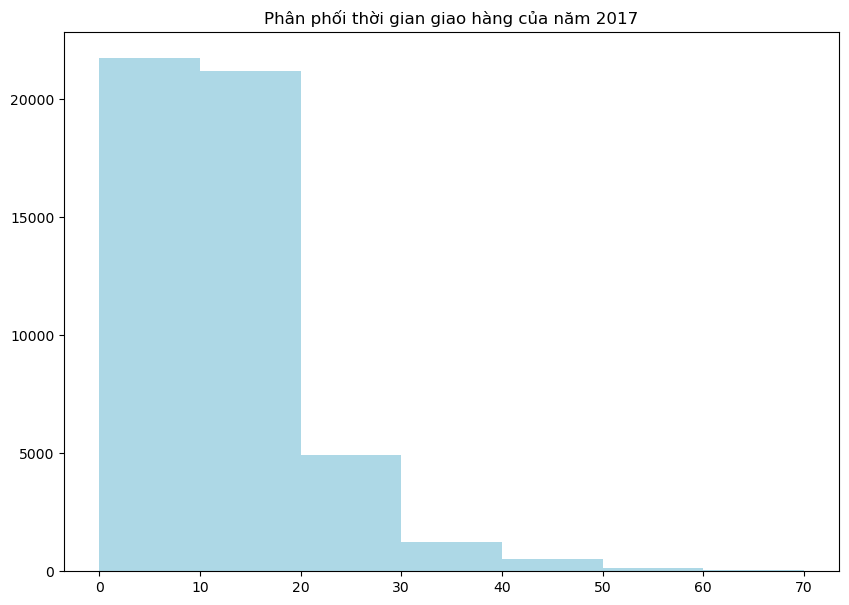

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(year2017['DeliveryTime'],color='lightblue', bins=[0,10,20,30,40,50,60,70])
plt.title('Phân phối thời gian giao hàng của năm 2017')
plt.show()

Thời gian giao hàng chủ yếu từ 20 ngày đổ về

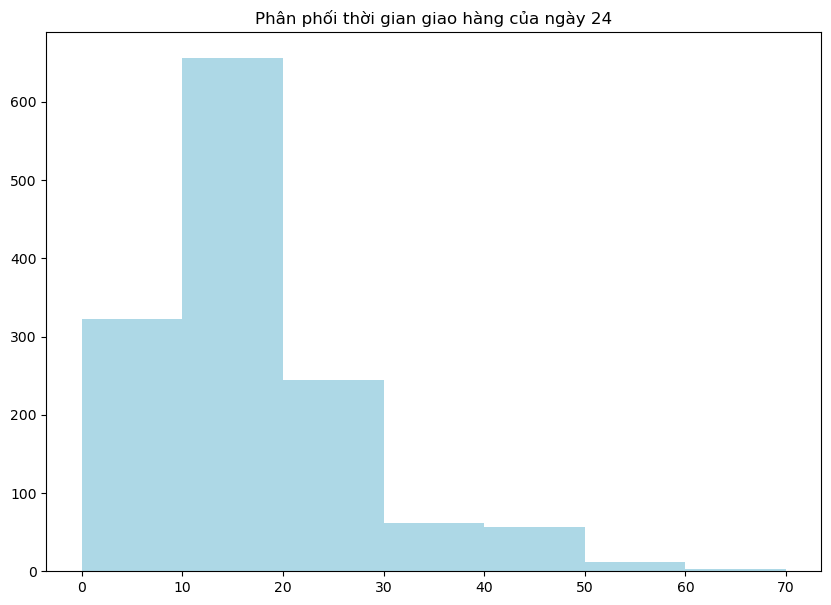

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(november2017[november2017.Day == 24]['DeliveryTime'],color='lightblue', bins=[0,10,20,30,40,50,60,70])
plt.title('Phân phối thời gian giao hàng của ngày 24')
plt.show()

Thời gian giao hàng chủ yếu từ 10 ngày trờ lên, lượng đơn hàng giao dưới 10 ngày giảm

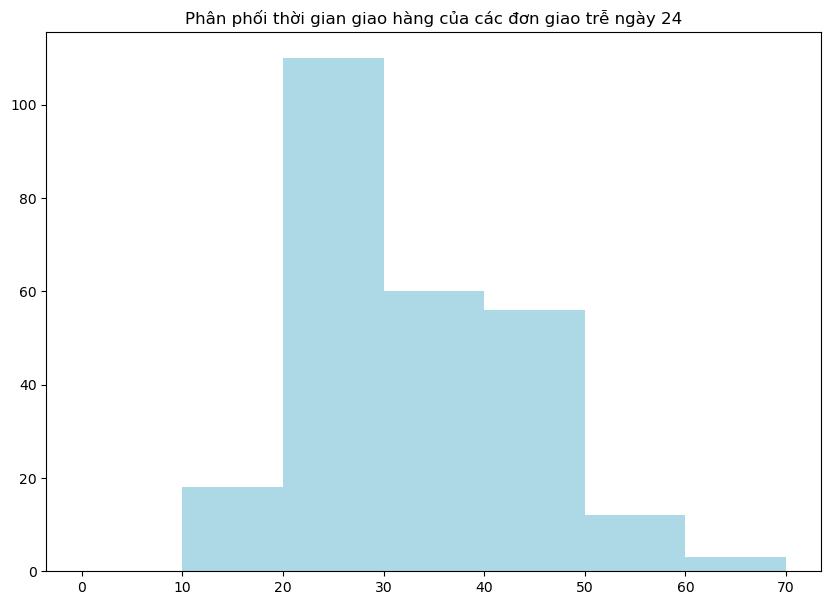

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(LateDelivery24.DeliveryTime,color='lightblue', bins=[0,10,20,30,40,50,60,70])
plt.title('Phân phối thời gian giao hàng của các đơn giao trễ ngày 24')
plt.show()

## AVG THỜI GIAN GIAO TRỄ

In [ ]:
LateDelivery24.cpwestimated.mean()

-9.788461538461538

Trung bình những đơn hàng giao trễ thì giao trễ hơn dự kiến 10 ngày

> Add blockquote




## Product

In [ ]:
LateDeliveryProduct24 = LateDelivery24.groupby('product_category_name_english')['order_id'].nunique().reset_index().sort_values('order_id')

In [ ]:
LateDeliveryProduct24

,product_category_name_english,order_id
0,audio,1
22,luggage_accessories,1
21,kitchen_dining_laundry_garden_furniture,1
18,home_confort,1
17,home_appliances,1
9,construction_tools_lights,1
13,food_drink,1
5,christmas_supplies,1
4,books_general_interest,1
6,cine_photo,1


In [ ]:
november24Product_totalorder

,product_category_name_english,order_id,revenue
20,fixed_telephony,1,32.78
6,books_technical,1,153.17
7,christmas_supplies,1,162.91
8,cine_photo,1,259.94
33,market_place,1,212.95
15,costruction_tools_garden,1,85.95
11,construction_tools_construction,1,31.82
13,construction_tools_safety,1,146.57
0,agro_industry_and_commerce,2,6503.19
27,home_appliances_2,2,880.55


In [ ]:
LateDeliveryProduct24['ratio']= LateDeliveryProduct24['order_id']/november24Product_totalorder['order_id']

In [ ]:
LateDeliveryProduct24

,product_category_name_english,order_id,ratio
0,audio,1,0.500000
22,luggage_accessories,1,0.011494
21,kitchen_dining_laundry_garden_furniture,1,0.333333
18,home_confort,1,0.027778
17,home_appliances,1,0.058824
9,construction_tools_lights,1,0.016393
13,food_drink,1,1.000000
5,christmas_supplies,1,0.166667
4,books_general_interest,1,0.006494
6,cine_photo,1,1.000000


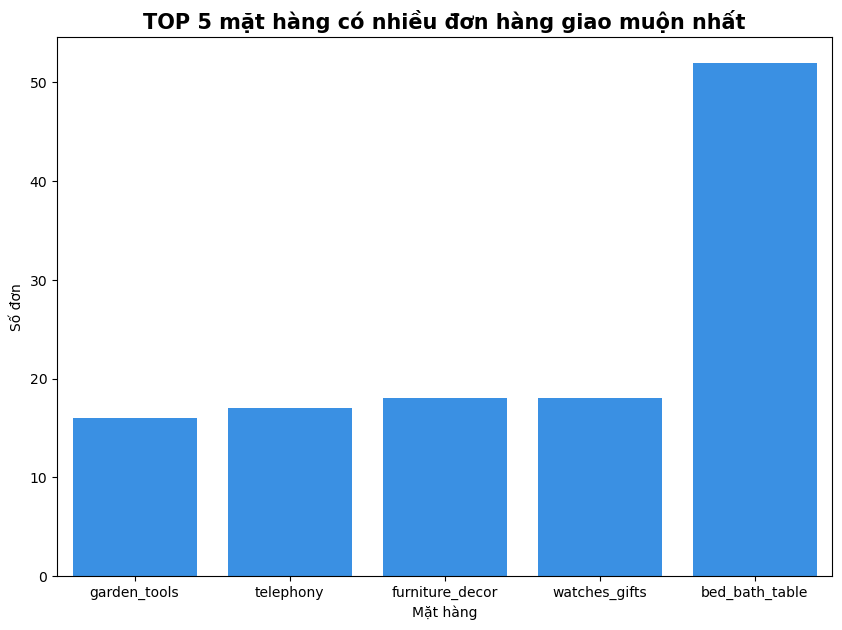

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data = LateDeliveryProduct24.tail(), x= 'product_category_name_english',y='order_id',color = 'dodgerblue')
plt.title('TOP 5 mặt hàng có nhiều đơn hàng giao muộn nhất',fontsize=15,fontweight='bold')
plt.xlabel('Mặt hàng')
plt.ylabel('Số đơn')
plt.show()

In [ ]:
november2017

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,...,DeliveryTime,approve_time,carrier_time,customer_time,cpwestimated,customer_day,Day,revenue,seller_city,seller_state
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,13,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12,20,18,72.20,belo horizonte,MG
1,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,5.0,1,cce679660c66e6fbd5c8091dfd29e9cd,...,6,0 days 00:10:41,2 days 21:18:04,3 days 20:55:34,13,4,21,29.75,ibitinga,SP
2,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,1.0,1,be021417a6acb56b9b50d3fd2714baa8,...,33,0 days 02:53:21,18 days 20:52:56,14 days 21:45:18,-8,15,24,356.12,rio do sul,SC
3,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,4.0,1,15a9e834e89eab39d973492882c658d6,...,4,1 days 04:49:03,2 days 19:15:43,0 days 22:21:39,12,1,30,91.66,sao paulo,SP
4,8f06cc6465925031568537b815f1198d,9916715c2ab6ee1710c9c32f0a534ad2,2017-11-15 11:31:41,2017-11-15 11:46:42,2017-11-16 22:03:00,2017-11-22 22:41:07,2017-12-05,5.0,1,12087840651e83b48206b82c213b76fd,...,7,0 days 00:15:01,1 days 10:16:18,6 days 00:38:07,12,6,15,317.34,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8532,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,2017-11-26 10:26:55,2017-11-26 10:36:06,2017-11-27 22:49:48,2017-12-16 02:54:56,2018-01-03,4.0,1,ea4f4b5a820fea007c6c8d7ef9a790bc,...,19,0 days 00:09:11,1 days 12:13:42,18 days 04:05:08,17,11,26,71.36,ribeirao preto,SP
8533,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15,5.0,1,526f833e1eb0a32ad9351145a761b9ab,...,8,0 days 00:11:26,0 days 22:39:36,8 days 00:05:16,9,22,26,141.40,sao paulo,SP
8534,788541a19c0791de0504c5a9cb7e7bd5,a537aaf902d2f436eb7f44817154bb68,2017-11-30 17:54:28,2017-11-30 18:16:25,2017-12-05 20:58:57,2017-12-13 20:34:50,2017-12-27,5.0,1,27d0fc55e3d2fe698088f2603e0a2ab6,...,13,0 days 00:21:57,5 days 02:42:32,7 days 23:35:53,13,8,30,147.35,santo andre,SP
8535,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08,4.0,1,9503faef00966962beacdb4916272305,...,10,0 days 00:10:49,5 days 20:50:00,4 days 23:29:54,5,25,21,319.25,sao paulo,SP


In [ ]:
sellers24 = november2017[november2017.Day == 24].groupby('seller_state')['order_id','approve_time','carrier_time'].agg({'order_id':'nunique','approve_time':'mean','carrier_time':'mean'}).reset_index().sort_values('order_id')

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\2595205230.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sellers24 = november2017[november2017.Day == 24].groupby('seller_state')['order_id','approve_time','carrier_time'].agg({'order_id':'nunique','approve_time':'mean','carrier_time':'mean'}).reset_index().sort_values('order_id')


In [ ]:
cpsellers24 = november2017[november2017.Day == 24]

In [ ]:

cpsellers24

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,...,DeliveryTime,approve_time,carrier_time,customer_time,cpwestimated,customer_day,Day,revenue,seller_city,seller_state
2,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,1.0,1,be021417a6acb56b9b50d3fd2714baa8,...,33,0 days 02:53:21,18 days 20:52:56,14 days 21:45:18,-8,15,24,356.12,rio do sul,SC
8,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,2017-11-24 21:55:22,2017-11-25 01:31:43,2017-11-28 22:37:15,2017-12-01 21:11:40,2017-12-15,4.0,1,a6ad77b15e566298a4e8ee2011ab1255,...,6,0 days 03:36:21,3 days 21:05:32,2 days 22:34:25,13,27,24,71.08,sao paulo,SP
9,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,2017-11-24 21:55:22,2017-11-25 01:31:43,2017-11-28 22:37:15,2017-12-01 21:11:40,2017-12-15,4.0,2,a6ad77b15e566298a4e8ee2011ab1255,...,6,0 days 03:36:21,3 days 21:05:32,2 days 22:34:25,13,27,24,71.08,sao paulo,SP
18,c263211bd219538f7c031591e87ef0d7,ed8c52327eecff596e141636d5b556d2,2017-11-24 16:56:46,2017-11-28 03:48:24,2017-12-08 23:28:26,2017-12-18 20:24:54,2017-12-19,5.0,1,028b0b0277744a9eaa2c4f57c24dcb68,...,24,3 days 10:51:38,10 days 19:40:02,9 days 20:56:28,0,10,24,376.97,sao paulo,SP
19,c263211bd219538f7c031591e87ef0d7,ed8c52327eecff596e141636d5b556d2,2017-11-24 16:56:46,2017-11-28 03:48:24,2017-12-08 23:28:26,2017-12-18 20:24:54,2017-12-19,5.0,2,028b0b0277744a9eaa2c4f57c24dcb68,...,24,3 days 10:51:38,10 days 19:40:02,9 days 20:56:28,0,10,24,376.97,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,b93b079468bdf6a20fd54cf45d1e03b6,e570debfd69192cdd2e846ae00869a33,2017-11-24 22:29:08,2017-11-25 01:31:36,2017-11-28 21:54:48,2017-12-11 21:11:35,2017-12-20,5.0,1,75d6b6963340c6063f7f4cfcccfe6a30,...,16,0 days 03:02:28,3 days 20:23:12,12 days 23:16:47,8,17,24,72.14,santo andre,SP
8508,efe279abeb0fb2d03273c495d19b9f29,a0973c8c7e186a3e7425bb1ae01b0c9c,2017-11-24 08:31:27,2017-11-24 08:56:30,2017-11-24 21:41:16,2017-12-06 03:13:29,2017-12-21,4.0,1,1e1a186a03f0d98268516827690d4fd2,...,11,0 days 00:25:03,0 days 12:44:46,11 days 05:32:13,14,18,24,78.87,sao paulo,SP
8518,d81e1aea4814c6e5744458bcd1f94693,70d1caf284f34ea4ee405e25edba63f5,2017-11-24 20:59:45,2017-11-25 00:37:55,2017-11-27 17:34:30,2017-12-05 19:07:39,2017-12-15,4.0,1,ea555c5a04b369a1505d5fca42617d7e,...,10,0 days 03:38:10,2 days 16:56:35,8 days 01:33:09,9,22,24,53.10,sao paulo,SP
8519,d81e1aea4814c6e5744458bcd1f94693,70d1caf284f34ea4ee405e25edba63f5,2017-11-24 20:59:45,2017-11-25 00:37:55,2017-11-27 17:34:30,2017-12-05 19:07:39,2017-12-15,4.0,2,ea555c5a04b369a1505d5fca42617d7e,...,10,0 days 03:38:10,2 days 16:56:35,8 days 01:33:09,9,22,24,53.10,sao paulo,SP


<AxesSubplot:>

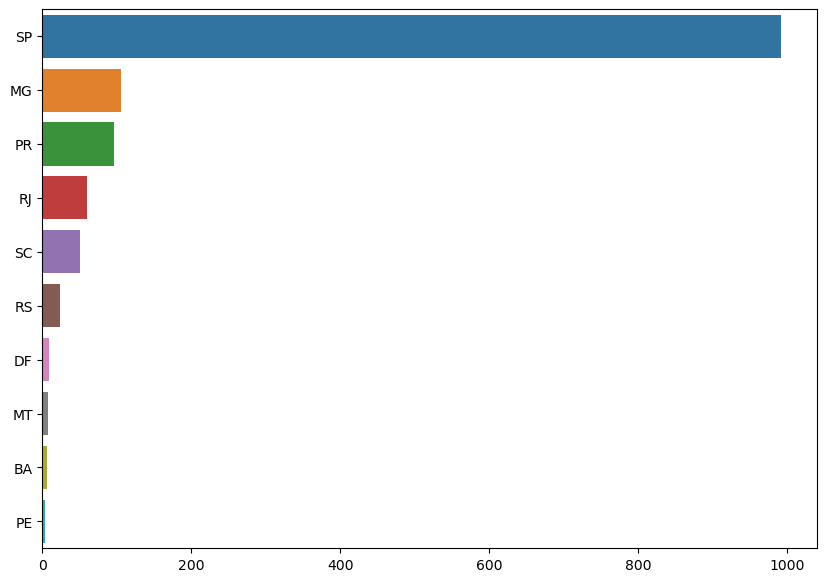

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y = cpsellers24.seller_state.value_counts().index[:10], x = cpsellers24.seller_state.value_counts().values[:10])

In [ ]:
sellers24['carrier_time'].mean()/year2017['carrier_time'].mean()

1.3545501462203853

In [ ]:
sellers24['carrier_time'].mean()

Timedelta('4 days 03:36:08.116756897')

In [ ]:
year2017['carrier_time'].mean()

Timedelta('3 days 01:31:53.800192199')

In [ ]:
sellers24['approve_time'].mean()/year2017['approve_time'].mean()

0.8389605810437458

In [ ]:
sellers24['approve_time'].mean()

Timedelta('0 days 08:36:34.524483441')

In [ ]:
year2017['approve_time'].mean()

Timedelta('0 days 10:15:43.958016336')

In [ ]:
dict_columns = {
    'figure':['Day24', '2017'],
    'approve_time':[sellers24['approve_time'].mean(), year2017['approve_time'].mean()],
    'carrier_time':[sellers24['carrier_time'].mean(), year2017['carrier_time'].mean()]
}

In [ ]:
df2 = pd.DataFrame(dict_columns)

In [ ]:
df2['approve_time'] = [8,10]
df2['carrier_time'] = [4,3]

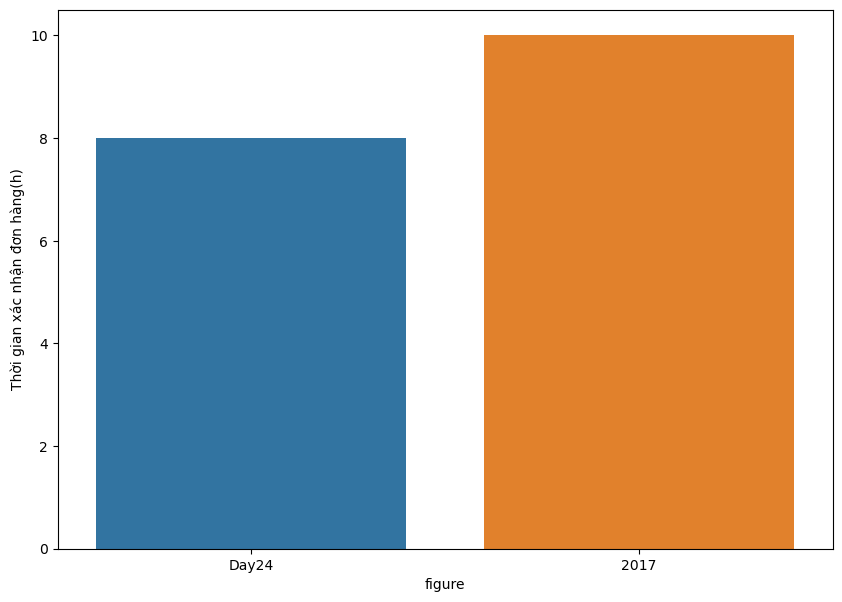

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df2,x = df2.figure,y= df2.approve_time)
plt.ylabel('Thời gian xác nhận đơn hàng(h)')
plt.show()

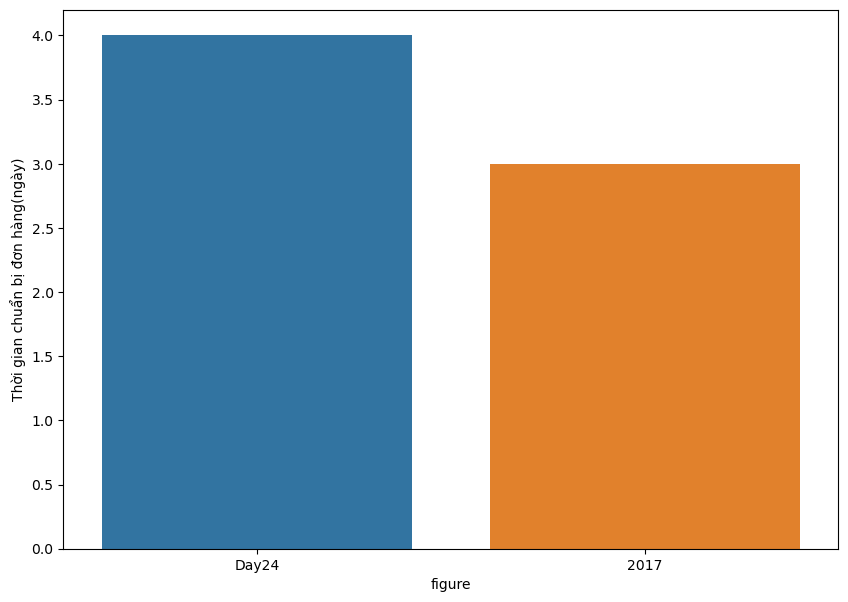

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df2,x = df2.figure,y= df2.carrier_time)
plt.ylabel('Thời gian chuẩn bị đơn hàng(ngày)')
plt.show()

In [ ]:
cp24 = sellers24.tail()
cp24

,seller_state,order_id,approve_time,carrier_time
12,SC,46,0 days 23:20:00.540000,4 days 03:14:48.800000
9,RJ,53,0 days 07:49:08.033333333,3 days 16:57:06.450000
8,PR,84,0 days 07:02:30.541666666,8 days 03:32:45
4,MG,89,0 days 10:24:44.283018867,5 days 06:00:48.037735849
14,SP,828,0 days 11:55:19.242179616,4 days 12:20:46.942482341


In [ ]:
cp24['approve_time'] = [23,8,7,10,11]
cp24['carrier_time'] = [4,3,8,5,4]
cp24

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\2320880689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp24['approve_time'] = [23,8,7,10,11]
C:\Users\vuhoa\AppData\Local\Temp\ipykernel_6584\2320880689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp24['carrier_time'] = [4,3,8,5,4]


,seller_state,order_id,approve_time,carrier_time
12,SC,46,23,4
9,RJ,53,8,3
8,PR,84,7,8
4,MG,89,10,5
14,SP,828,11,4


Text(0.5, 1.0, 'Thời gian xác nhận đơn hàng của top 5 seller state')

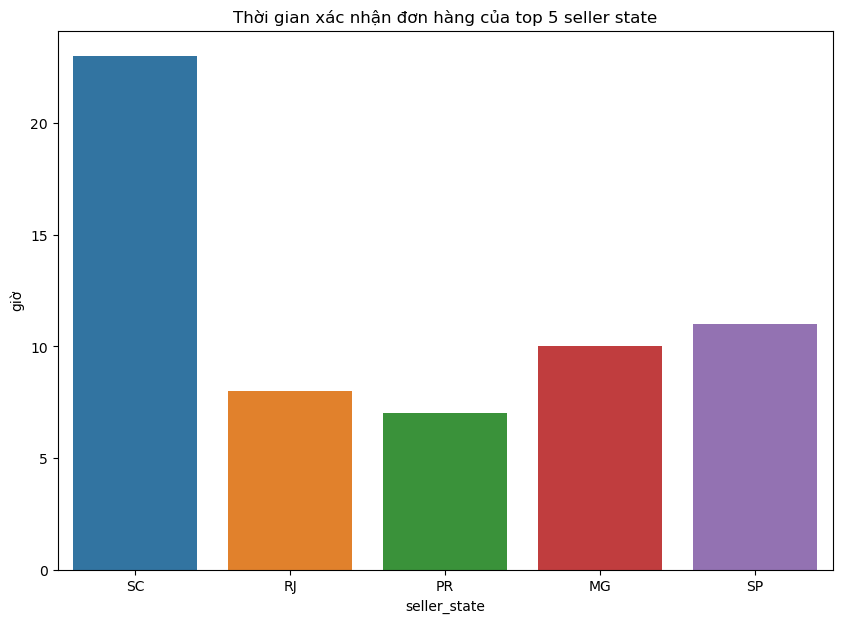

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data = cp24,x=cp24.seller_state,y=cp24.approve_time)
plt.ylabel('giờ')
plt.title('Thời gian xác nhận đơn hàng của top 5 seller state')

Text(0.5, 1.0, 'Thời gian chuân bị hàng của top 5 seller state')

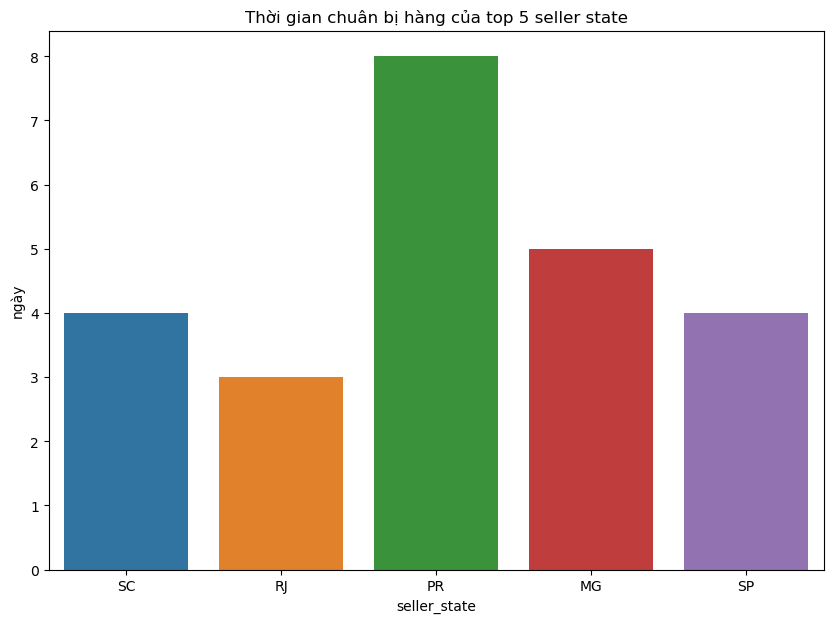

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data = cp24,x=cp24.seller_state,y=cp24.carrier_time)
plt.ylabel('ngày')
plt.title('Thời gian chuân bị hàng của top 5 seller state')

## Customer_time


In [ ]:
black_friday=november2017[november2017.Day == 24].reset_index()
black_friday['customer_day'].min()

0

In [ ]:
year2017['customer_time'].min()

Timedelta('-17 days +21:41:31')

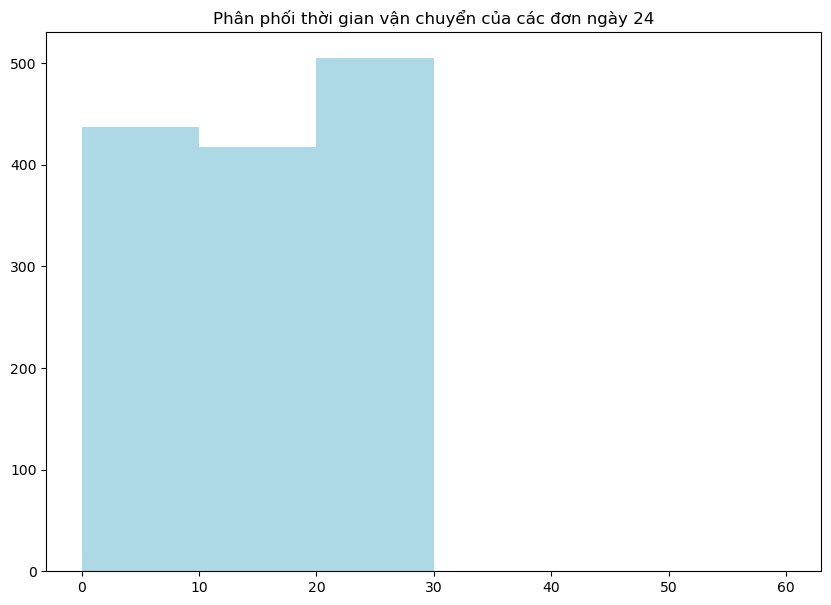

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(black_friday['customer_day'],color='lightblue', bins=[0,10,20,30,40,50,60])
plt.title('Phân phối thời gian vận chuyển của các đơn ngày 24')
plt.show()

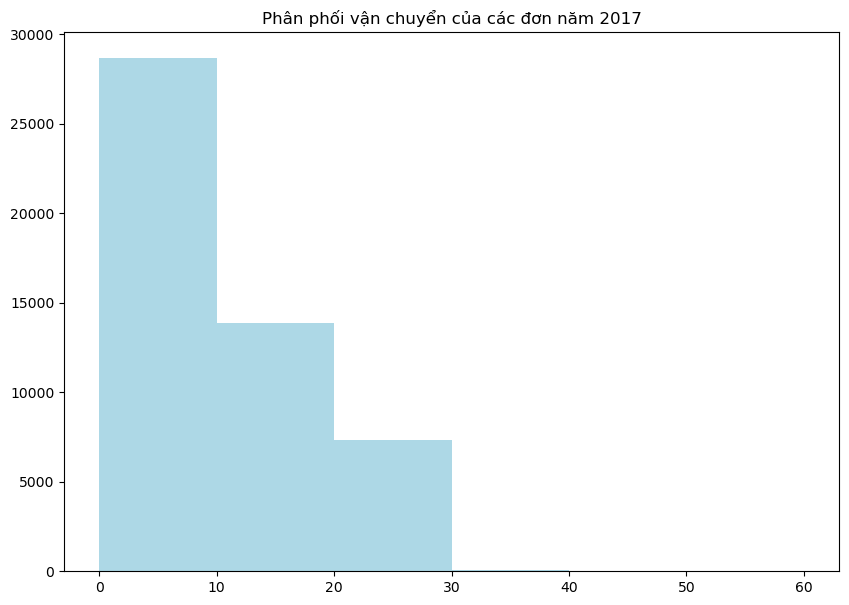

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(year2017['customer_day'],color='lightblue', bins=[0,10,20,30,40,50,60])
plt.title('Phân phối vận chuyển của các đơn năm 2017')
plt.show()